### ONLINE SHOPPING ANALYTICS

#### Measure how many people are completing a series of steps like Add To Cart and Purchase to see how effectively a business is driving conversions.

#### In this project I have worked on the Brazilian E-commerce Dataset (https://www.kaggle.com/olistbr/brazilian-ecommerce), which i have used to analyze and visualize the customer behaviour on the products and how the sales and customer satisfaction can be improved.

#### Importing the essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

#### Importing the Dataset

In [428]:
sellers=pd.read_csv('.../olist_sellers_dataset.csv')
customers=pd.read_csv('.../olist_customers_dataset.csv')
products=pd.read_csv('.../olist_products_dataset.csv')
payments=pd.read_csv('.../olist_order_payments_dataset.csv')
orders=pd.read_csv('.../olist_orders_dataset.csv')
order_items=pd.read_csv('.../olist_order_items_dataset.csv')
reviews=pd.read_csv('.../olist_order_reviews_dataset.csv')
english_names=pd.read_csv('.../product_category_name_translation.csv')

#### Visualizing the Dataset Tables

In [429]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [379]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [380]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [381]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [382]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [383]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [384]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Data Analysis

#### 1. State-wise No of Orders : This would help in knowing as from which state the no of orders are more

In [385]:
#Calculating the total no of orders
orders.shape

(99441, 8)

In [386]:
df1=pd.merge(orders, customers, on="customer_id", how="left")

In [387]:
df1=df1[["order_id", "customer_id", "customer_state"]]

In [388]:
df1.head()

,order_id,customer_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,SP


In [389]:
count_states=df1['customer_state'].value_counts()# This will give a DataFrame of the count of no of orders from each state
count_states.head()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

In [390]:
count_states['others']=count_states[count_states<1500].sum()
x=np.array(count_states[count_states>2000].index)
y=np.array(count_states[count_states>2000].values)

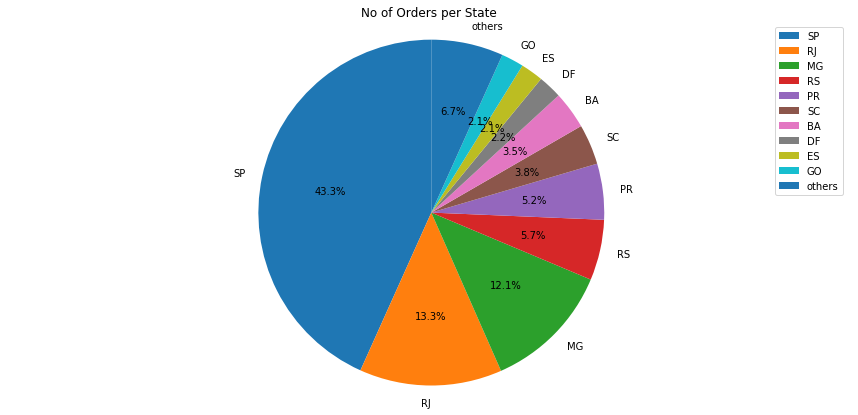

In [391]:
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(y, labels=x, autopct='%1.1f%%', radius=2000, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("No of Orders per State")
plt.legend(x)
plt.show()

### Inference
1. The above chart clearly shows that majority of orders have came through the SP state.


2. So advertizing and promoting your product in that state will have a high impact on the sales of a product.

#### 2. Time Series Analysis: To know in which month the sales are more or people will most likely to buy.

In [392]:
df2=pd.merge(orders, order_items, on="order_id", how="right")
df2=df2[["order_id", "order_purchase_timestamp", "price"]]

In [393]:
df2.head()

,order_id,order_purchase_timestamp,price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [394]:
df2['datetime'] =  pd.to_datetime(df2['order_purchase_timestamp'])
value_month = df2[['datetime', 'price']].copy()
value_month.set_index('datetime', inplace=True)
value_month = value_month.groupby(pd.Grouper(freq="M"))['price'].sum()

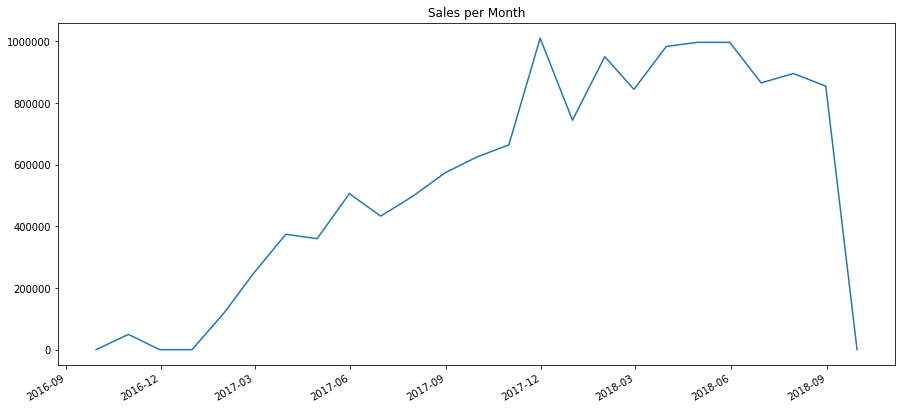

In [395]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(value_month.index, value_month.values)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.set_title('Sales per Month')
plt.show()

### Inference

1. There is a huge spike in Nov 24 due to Black Friday


2. Sales are weak after Dec 20 (end-year holidays)


3. In 2016, there are some sales in october, but almost any in the following months

#### 3. Payment Modes: To know which payment mode do people usually prefer to buy items.

In [396]:
payments.shape

(103886, 5)

In [397]:
count_paymentMode=payments["payment_type"].value_counts()

In [398]:
count_paymentMode=count_paymentMode[count_paymentMode>100]

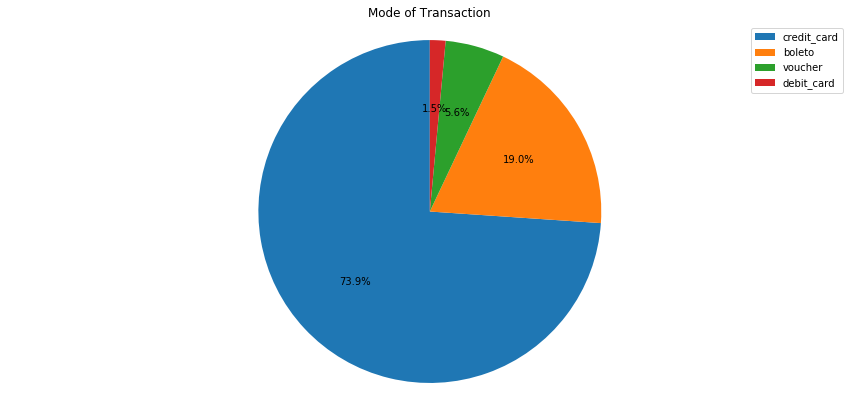

In [399]:
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(count_paymentMode.values, autopct='%1.1f%%', radius=2000, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Mode of Transaction")
plt.legend(count_paymentMode.index)
plt.show()

#### This plot shows the total count of the different transactions used by people.

In [400]:
df3=pd.merge(payments, df1, on="order_id", how="left")

In [401]:
df3.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,SP


In [402]:
a=df3["customer_state"].value_counts()
a["others"]=a[a<2000].sum()
a=a[a>2000]

In [403]:
df4=df3[df3["customer_state"].isin(a.index) & df3["payment_type"].isin(["credit_card", "boleto", "voucher", "debit_card"])]

In [404]:
df4.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,SP


Text(0.5,1,'Payments mode per state')

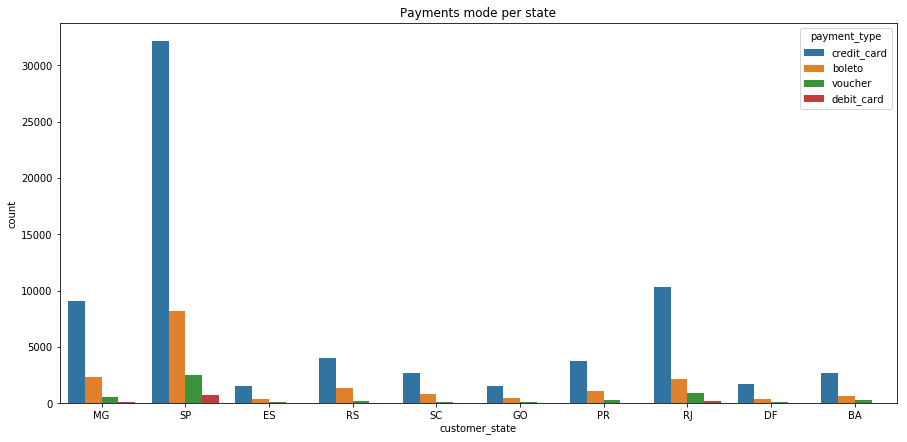

In [405]:
plt.figure(figsize=(15,7))
sns.countplot(x="customer_state", hue="payment_type", data=df4 )
plt.title("Payments mode per state")

### Inference
1. The First pie chart shows the total use of the different types of payments used.


2. Second bar graph shows the count of differnt types of payment used per state.


3. With this it can be infered that vast majority of people prefers credit card over other modes.


4. So to improve the sales we can offer more offers on the credit cards especially in the peak months as shown in the previous time series analysis graph.

#### 4. Sales of Products in various States

In [406]:
english_names.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [407]:
btoe=pd.Series(english_names.product_category_name_english.values, index=english_names.product_category_name).to_dict()
products["product_category_name"]=products["product_category_name"].map(btoe)

In [408]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [409]:
df5=pd.merge(order_items, products, on="product_id", how="left")

In [410]:
df5=df5[["order_id", "product_id", "product_category_name"]]

In [411]:
df5.head()

,order_id,product_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools


In [412]:
df6=pd.merge(orders, customers, on="customer_id", how="left")

In [413]:
df6=df6[["order_id", "customer_id", "customer_city", "customer_state" ]]

In [414]:
df6.head()

,order_id,customer_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP


In [415]:
df7=pd.merge(df5, df6, on="order_id", how="left")

In [416]:
df7.head()

,order_id,product_id,product_category_name,customer_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP


In [417]:
df7.shape

(112650, 6)

In [418]:
df7=df7[df7["customer_state"].isin(["SP", "RJ", "MG"])]

In [419]:
b=df7["product_category_name"].value_counts()
b["others"]=b[b<2000].sum()
b=b[b>2000]

In [420]:
df7=df7[df7["product_category_name"].isin(b.index)]

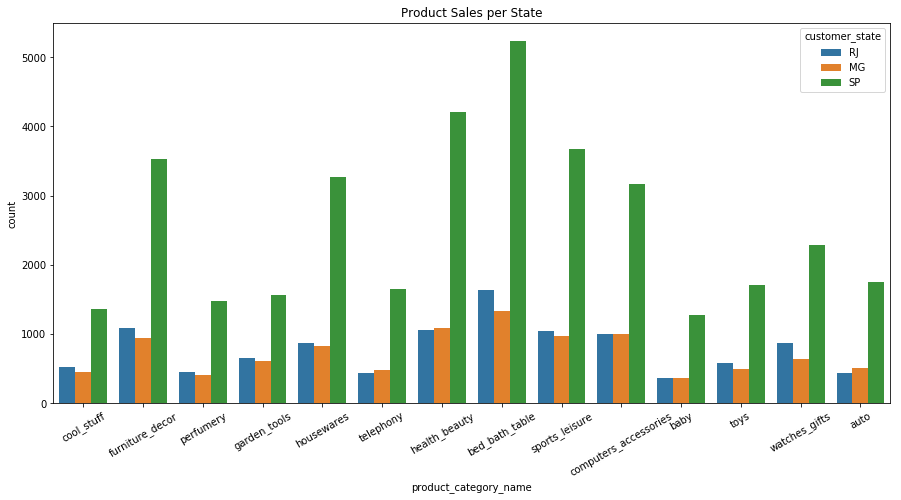

In [421]:
plt.figure(figsize=(15,7))
chart=sns.countplot(x="product_category_name", hue="customer_state", data=df7 )
chart.set_xticklabels( chart.get_xticklabels(), rotation=30 )
plt.title("Product Sales per State")
plt.show()

### Inference
1. People in SP mostly buy Bed_Bath_Table so more discounts and offers can be given on it to inc the sales.


2. Also the sales of health_beauty is more than computer_accessories so we can more offers on health_beauty rather than giving it to the computer accessories which most bussinesses do.

## Summary

### What I had tried to Achieve


1. Which areas are the huge market for our products to better target the customers.


2. What time is best for the launch of Big Sales events like Flipkart does on its Big Billion Days and Amazon on its Great Indian Festival that helps them to lure huge customers into their Bussiness.


3. Which type of Transactions do people prefer for the payments and from my analysis its clearly visible that people go over the online transactio rather than COD as this will also help in reducing black money and customers can get more discounts from their banks cards which will inturn give them a good experience on the shopping.


4. Which products do people commonly buy in a particular state as this would help us in understanding the customer behaviour and then we can give offers and discounts only on the product that people will mostly prefer to buy rather than giving to it to the random products like electronics that most sellers usually give.

### Further Analysis on the Dataset

##### There are much more analysis that I thought could be done like
1. Sales of the products have got the most reviews
2. Sales of the products that have got a very nice Description
3. Delivery time of the products
4. Sales of the products that have got the most clear and detailed photos
##### But these factors depends on the Product and the better they are the better the sales and customer satisfaction would be.


### In this Report I had tried to do the Customer Segmentation and predict their behaviour for various products.

### Made By: Rohan Goel